# Импорт

In [12]:
import pandas as pd
import numpy as np
from __future__ import division, print_function

import seaborn as sns
%pylab inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Populating the interactive namespace from numpy and matplotlib


## Загрузка & первоначальный анализ

In [13]:
fold = 'C:\Virtual\ibm\\'
purchases = pd.read_csv(fold+'Purchase_Task.csv')

print (purchases.shape)
purchases['TIMESTAMP'] = pd.to_datetime(purchases['TIMESTAMP'])
purchases[:5]

(154110, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE
0,3520894568428972544,50191437021527314046259,2015-11-01 05:22:06,537739.0,256.0
1,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
2,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
3,3232727606581901824,50031441922087318075606,2015-11-01 05:24:15,506594.0,264.0
4,4630562004574258176,50181423850284296776983,2015-11-01 05:26:53,508138.0,19.0


In [14]:
purchases.describe()

,SESSION_ID,PRODUCT_ID,BASE_PRICE
count,1.541100e+05,154110.000000,154110.000000
mean,4.590869e+18,573920.149679,87.053773
std,2.639453e+18,70732.783799,103.542093
min,2.107022e+14,106710.000000,0.000000
25%,2.338067e+18,536124.000000,15.000000
50%,4.588272e+18,589362.000000,29.000000
75%,6.836535e+18,621564.500000,200.000000
max,9.222999e+18,998881.000000,331.000000


In [15]:
#уникальных продуктов 
print (purchases.PRODUCT_ID.nunique())
#уникальных SESSION_ID
print (purchases.SESSION_ID.nunique())
#уникальных COOKIE_ID
print (purchases.COOKIE_ID.nunique())

11938
66005
62127


# Поиск дублей

In [16]:
#Ищем одинаковые строки по всем столбцам
linit=purchases.columns
purchases[purchases.duplicated(linit,keep=False)].sort_values(by=['SESSION_ID','BASE_PRICE','PRODUCT_ID'])

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE
710,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0
712,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0
711,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0
714,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0
709,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0
713,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0
12349,563711563367633,30151389349546004393610,2015-11-02 17:07:14,634764.0,19.0
12352,563711563367633,30151389349546004393610,2015-11-02 17:07:14,634764.0,19.0
12350,563711563367633,30151389349546004393610,2015-11-02 17:07:14,626061.0,119.0
12351,563711563367633,30151389349546004393610,2015-11-02 17:07:14,626061.0,119.0


In [17]:
# Общее число строк-дубликотов
print (np.shape(purchases[purchases.duplicated()])[0])

35557


#### Если достоверно известно, что наличие дубликата не несет дополнительной информации, то нижеследующий признак можно не добавлять:

In [18]:
print (np.shape(purchases))
purchases = purchases.groupby(list(purchases.columns)).size().reset_index().rename(columns={0:'REC_COUNT'})
purchases.head(7)

(154110, 5)


,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2
2,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0,2
3,213154019631725,50171446221820221706383,2015-11-13 02:58:21,617537.0,20.0,1
4,411423193366617,70151375201030286672274,2015-11-10 03:29:11,600318.0,20.0,1
5,411423193366617,70151375201030286672274,2015-11-10 03:29:12,479839.0,18.0,1
6,411423193366617,70151375201030286672274,2015-11-10 03:29:12,581425.0,8.0,1


In [19]:
# видно, что возможно различное число дубликатов
purchases.REC_COUNT.value_counts()

1    83513
2    34781
4      258
3        1
Name: REC_COUNT, dtype: int64

In [20]:
#удаляем дубли
purchases = purchases.drop_duplicates(linit)
print (np.shape(purchases))

(118553, 6)


# Анализ session и cookie

In [21]:
purchases[(purchases.SESSION_ID == 6526585647633777664) | (purchases.COOKIE_ID=='80161445253327296350684')]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT
84802,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,626685.0,27.0,2
84803,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,636979.0,31.0,2
114082,8855788542052372480,80161445253327296350684,2015-11-05 20:53:00,626685.0,27.0,2


## Добавляем признаков по TIMESTAMP

In [22]:
print (max(purchases.TIMESTAMP))
print (min(purchases.TIMESTAMP))

2015-11-30 23:59:34
2015-11-01 05:22:06


In [23]:
purchases['day'] = purchases['TIMESTAMP'].dt.day
purchases['dayofweek'] = purchases['TIMESTAMP'].dt.dayofweek
purchases['hour'] = purchases['TIMESTAMP'].dt.hour
purchases['minute'] = purchases['TIMESTAMP'].dt.minute
purchases['second'] = purchases['TIMESTAMP'].dt.second

purchases[:5]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2,1,6,14,15,50
2,210702168536172,50241446232790285438882,2015-11-01 14:15:50,801359.0,7.0,2,1,6,14,15,50
3,213154019631725,50171446221820221706383,2015-11-13 02:58:21,617537.0,20.0,1,13,4,2,58,21
4,411423193366617,70151375201030286672274,2015-11-10 03:29:11,600318.0,20.0,1,10,1,3,29,11


# Визуализации

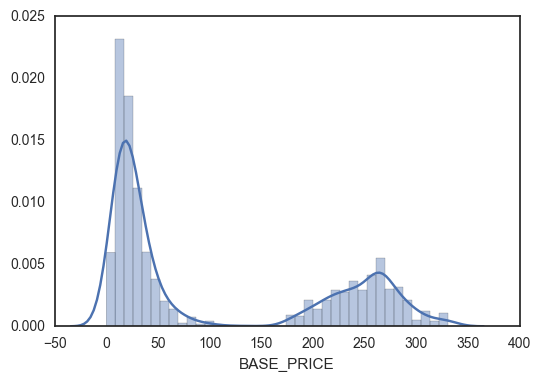

In [24]:
sns.distplot(purchases.BASE_PRICE)

## Распределение покупок по времени

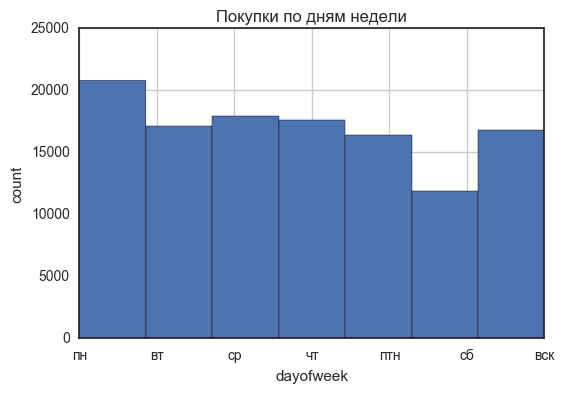

In [25]:
p = purchases.dayofweek.hist(bins=7)
p.set_xlabel('dayofweek')
p.set_ylabel('count')
p.set_xlim([0, 6])
p.set_xticklabels([u'пн', u'вт', u'ср', u'чт', u'птн', u'сб', u'вск'])
p.set_title(u'Покупки по дням недели')

In [26]:
purchases.head(1)

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50


(0, 60)

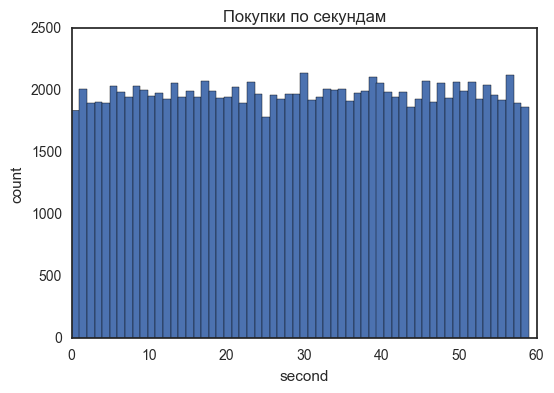

In [27]:
plt.hist(purchases.second.values, bins=60)
plt.xlabel('second')
plt.ylabel('count')
plt.title(u'Покупки по секундам')
plt.xlim([0, 60])

(0, 60)

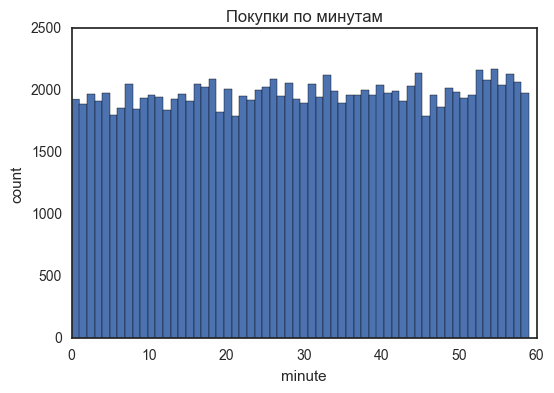

In [28]:
plt.hist(purchases.minute.values, bins=60)
plt.xlabel('minute')
plt.ylabel('count')
plt.title(u'Покупки по минутам')
plt.xlim([0, 60])

(0, 24)

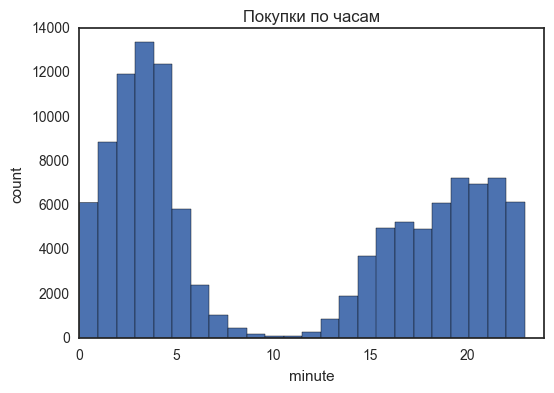

In [29]:
plt.hist(purchases.hour.values, bins=24)
plt.xlabel('minute')
plt.ylabel('count')
plt.title(u'Покупки по часам')
plt.xlim([0, 24])

In [30]:
# число дней
purchases.day.nunique()

30

(0, 30)

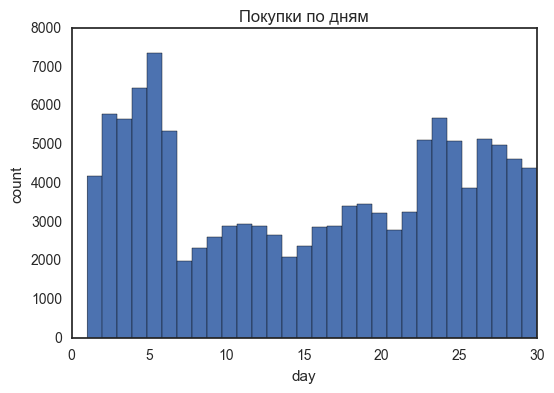

In [31]:
plt.hist(purchases.day.values, bins=30)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Покупки по дням')
plt.xlim([0, 30])

## Другие графики

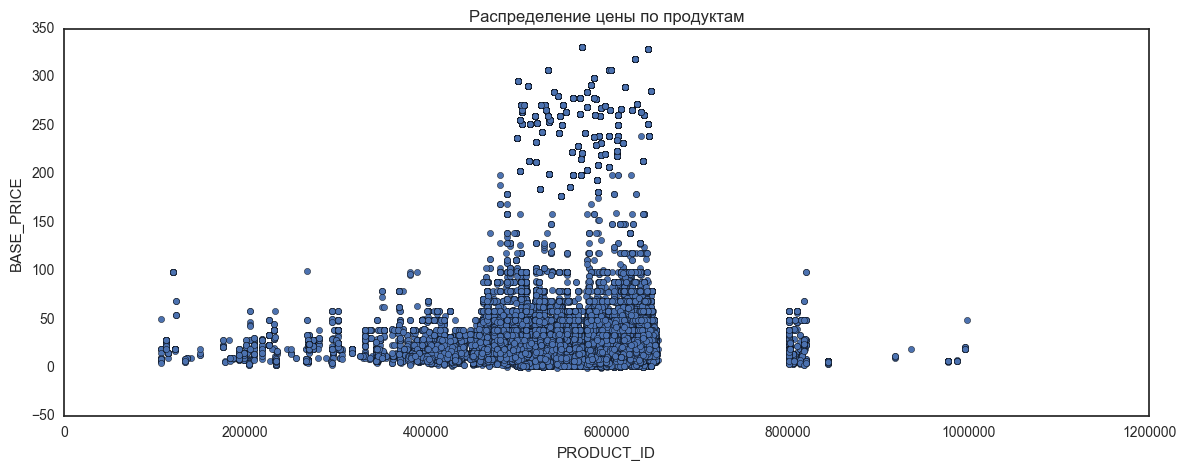

In [32]:
figsize(14, 5) 
purchases[['PRODUCT_ID', 'BASE_PRICE']].plot(kind='scatter', x='PRODUCT_ID', y='BASE_PRICE', title=u'Распределение цены по продуктам')

In [33]:
purchases.head(2)

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second
0,210702168536172,50241446232790285438882,2015-11-01 14:15:50,267534.0,7.0,2,1,6,14,15,50
1,210702168536172,50241446232790285438882,2015-11-01 14:15:50,590730.0,31.0,2,1,6,14,15,50


# Создаем сводную таблицу

## Группировка по сессиям

In [34]:
#число записей по сессии
purchases['SESSION_ID_COUNT'] = purchases.groupby(['SESSION_ID'])['SESSION_ID'].transform('count')
#число кук по сессиям
#purchases['UNIQUE_COOKIE'] = purchases.groupby(['SESSION_ID'])['COOKIE_ID'].transform(lambda x: x.nunique()).astype(int64)


In [35]:
#time diff в секундах 
purchases['TdiffTotal'] = (purchases.groupby(['SESSION_ID'])['TIMESTAMP'].transform(max) - \
                     purchases.groupby(['SESSION_ID'])['TIMESTAMP'].transform(min)).astype('timedelta64[s]')
purchases['temp'] = purchases.groupby('SESSION_ID')['TIMESTAMP'].diff()
purchases['TdiffMax'] = purchases.groupby('SESSION_ID')['temp'].transform(max).astype('timedelta64[s]')
purchases['TdiffMin'] = purchases.groupby('SESSION_ID')['temp'].transform(min).astype('timedelta64[s]')


In [36]:
#число уникальных time
 #purchases['TUnique'] = purchases.groupby('SESSION_ID')['temp'].transform(min).astype('timedelta64[s]')   
#число уникальных PRODUCT_ID
purchases['PUnique'] = purchases.groupby(['SESSION_ID'])['PRODUCT_ID'].transform(lambda x: x.nunique())
#mean BASE_PRICE
purchases['Price_mean'] = purchases.groupby(['SESSION_ID'])['BASE_PRICE'].transform(mean)
purchases['Price_sum'] = purchases.groupby(['SESSION_ID'])['BASE_PRICE'].transform(sum)
purchases['Price_median'] = purchases.groupby(['SESSION_ID'])['BASE_PRICE'].transform(lambda x: x.median())

In [37]:
#sum BASE_PRICE / time diff
purchases['temp'] = purchases.groupby(['SESSION_ID'])['BASE_PRICE'].transform(sum)
purchases['Price_by_time_diff'] = purchases['temp'] / purchases['TdiffTotal'] 


In [38]:
#число записей / time diff
purchases['SESSION_ID_COUNT_by_time_diff'] = purchases['SESSION_ID_COUNT'] / purchases['TdiffTotal'] 
#число кук / time diff
#purchases['UNIQUE_COOKIE_by_time_diff'] = purchases['UNIQUE_COOKIE'] / purchases['TdiffTotal'] 

del purchases['temp']

In [39]:
purchases[(purchases.SESSION_ID == 6526585647633777664) | (purchases.COOKIE_ID=='80161445253327296350684')]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
84802,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,626685.0,27.0,2,3,1,0,58,6,2,0.0,0.0,0.0,2.0,29.0,58.0,29.0,inf,inf
84803,6526585647633777664,80161445253327296350684,2015-11-03 00:58:06,636979.0,31.0,2,3,1,0,58,6,2,0.0,0.0,0.0,2.0,29.0,58.0,29.0,inf,inf
114082,8855788542052372480,80161445253327296350684,2015-11-05 20:53:00,626685.0,27.0,2,5,3,20,53,0,1,0.0,NaN,NaN,1.0,27.0,27.0,27.0,inf,inf


In [40]:
purchases[(purchases.SESSION_ID == 5351922903166403584)]

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE,REC_COUNT,day,dayofweek,hour,minute,second,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
69500,5351922903166403584,80071446336930327086739,2015-11-01 07:52:25,571436.0,216.0,1,1,6,7,52,25,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69501,5351922903166403584,80071446336930327086739,2015-11-01 08:46:44,633482.0,272.0,1,1,6,8,46,44,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69502,5351922903166403584,80071446336930327086739,2015-11-01 09:14:30,562715.0,199.0,1,1,6,9,14,30,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69503,5351922903166403584,80071446336930327086739,2015-11-01 09:56:14,572198.0,331.0,1,1,6,9,56,14,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69504,5351922903166403584,80071446336930327086739,2015-11-01 10:08:00,577958.0,269.0,1,1,6,10,8,0,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69505,5351922903166403584,80071446336930327086739,2015-11-01 11:42:34,512993.0,291.0,1,1,6,11,42,34,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69506,5351922903166403584,80071446336930327086739,2015-11-01 12:53:54,577958.0,269.0,1,1,6,12,53,54,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69507,5351922903166403584,80071446336930327086739,2015-11-01 13:30:52,611396.0,235.0,1,1,6,13,30,52,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433
69508,5351922903166403584,80071446336930327086739,2015-11-01 13:38:49,549545.0,177.0,1,1,6,13,38,49,9,20784.0,5674.0,477.0,8.0,251.0,2259.0,269.0,0.108689,0.000433


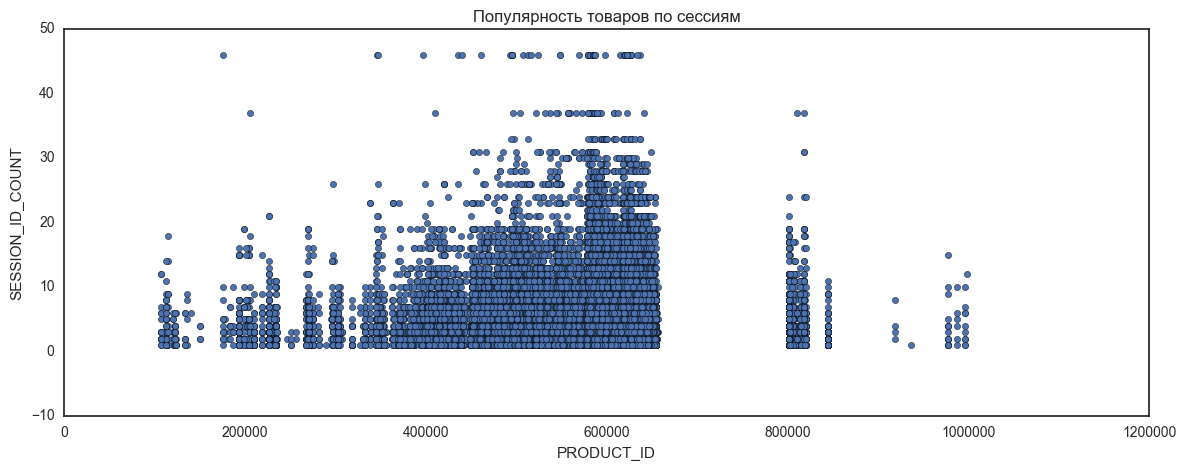

In [41]:
figsize(14, 5) 
purchases[['PRODUCT_ID', 'SESSION_ID_COUNT']].plot(kind='scatter', x='PRODUCT_ID', y='SESSION_ID_COUNT', title=u'Популярность товаров по сессиям')

# Формируем таблицу параметров уникальных сессий

In [86]:
sessions = purchases.drop(['COOKIE_ID', 'COOKIE_ID', 'TIMESTAMP', 'PRODUCT_ID', 'BASE_PRICE', 'day', 'dayofweek','hour','minute','second'],1).\
                    groupby('SESSION_ID').first()

In [84]:
print (np.shape(sessions))
sessions.describe()

(62127, 11)


,REC_COUNT,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
count,62127.000000,62127.000000,62127.000000,21735.000000,21735.000000,62127.000000,62127.000000,62127.000000,62127.000000,6.212300e+04,6.212700e+04
mean,1.219164,1.786196,219.479469,590.497078,399.157396,1.778663,145.129256,189.213305,144.335699,inf,inf
std,0.423603,1.723391,844.177344,1201.462315,985.220686,1.712092,113.653285,162.056684,114.458571,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.289308e-04,1.747335e-04
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,25.000000,48.000000,24.000000,inf,inf
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,187.000000,206.000000,187.000000,NaN,NaN
75%,1.000000,2.000000,0.000000,528.000000,2.000000,2.000000,256.000000,266.000000,256.000000,inf,inf
max,4.000000,46.000000,20784.000000,11470.000000,11446.000000,45.000000,331.000000,2832.000000,331.000000,inf,inf


## Scatter plot по полученной таблице

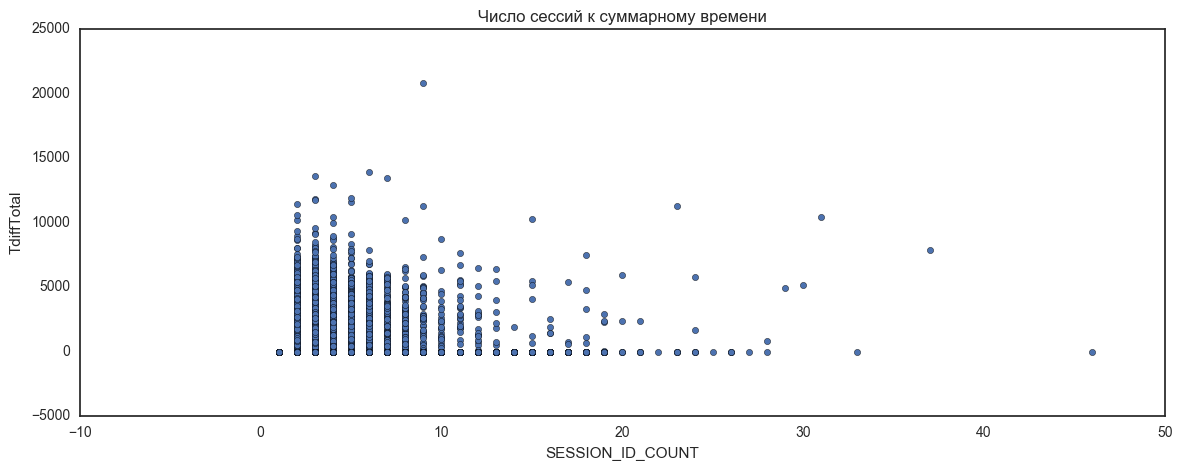

In [46]:
figsize(14, 5) 
sessions[['SESSION_ID_COUNT', 'TdiffTotal']].plot(kind='scatter', x='SESSION_ID_COUNT', y='TdiffTotal', title=u'Число сессий к суммарному времени')

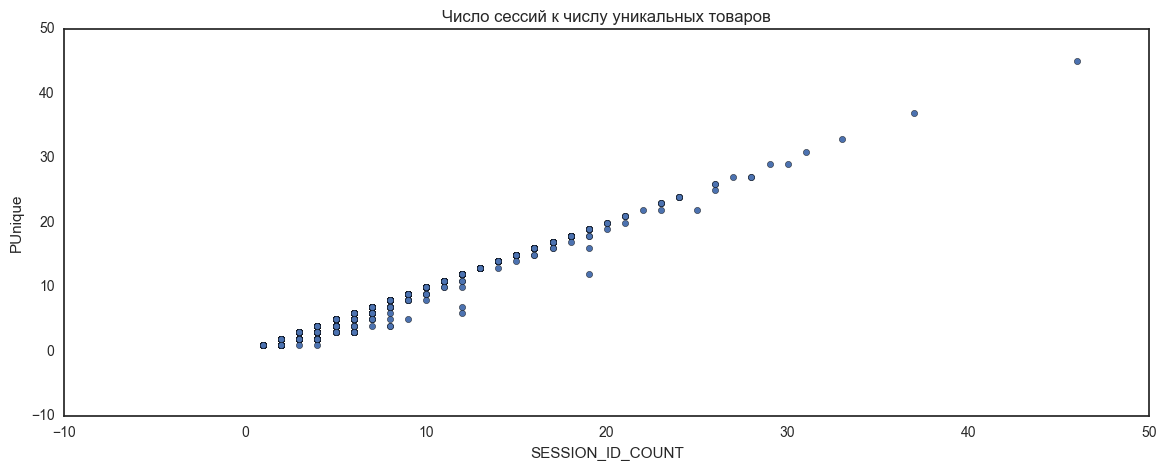

In [47]:
figsize(14, 5)
sessions[['SESSION_ID_COUNT', 'PUnique']].plot(kind='scatter', x='SESSION_ID_COUNT', y='PUnique', title=u'Число сессий к числу уникальных товаров')

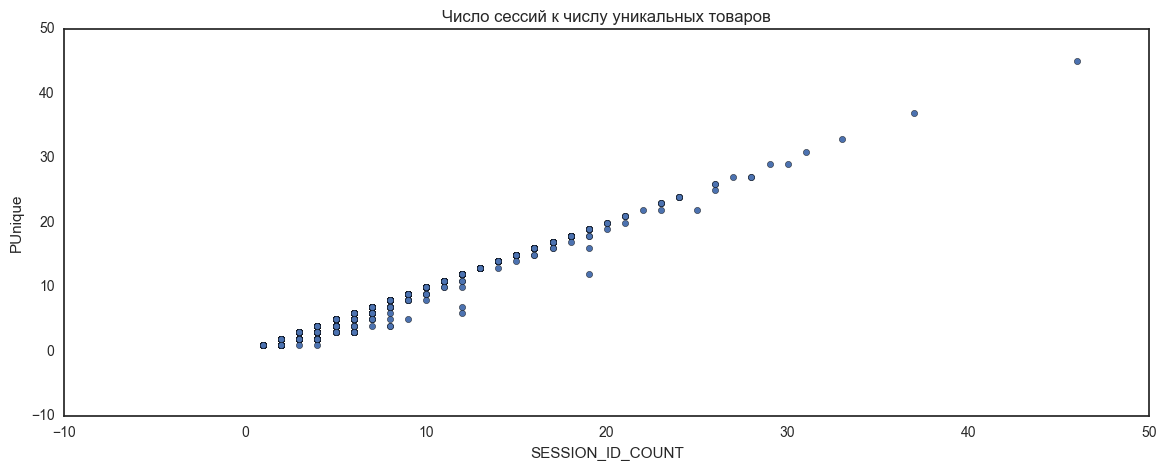

In [48]:
figsize(14, 5)
sessions[['SESSION_ID_COUNT', 'PUnique']].plot(kind='scatter', x='SESSION_ID_COUNT', y='PUnique', title=u'Число сессий к числу уникальных товаров')

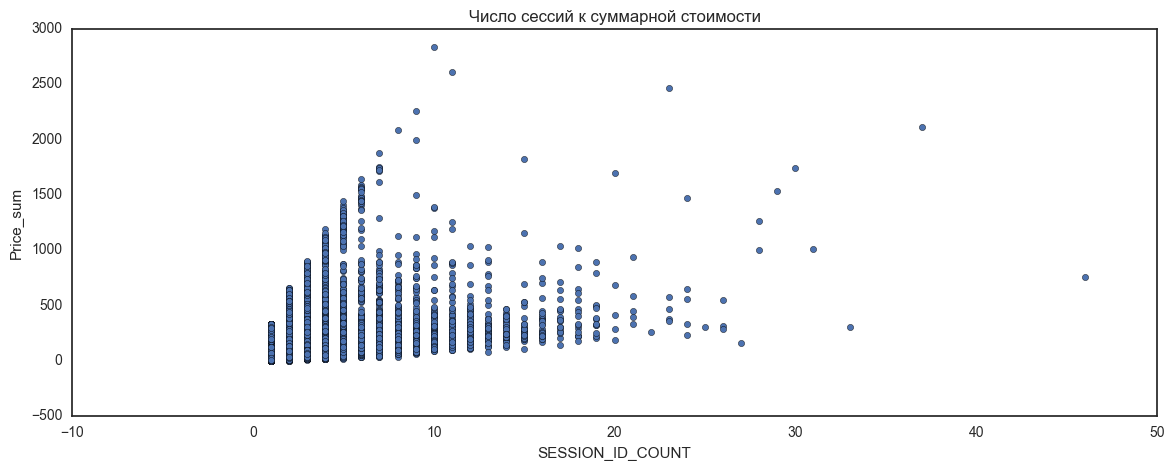

In [49]:
figsize(14, 5) 
sessions[['SESSION_ID_COUNT', 'Price_sum']].plot(kind='scatter', x='SESSION_ID_COUNT', y='Price_sum', title=u'Число сессий к суммарной стоимости')

In [50]:
sessions.describe()

,REC_COUNT,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
count,66005.000000,66005.000000,66005.000000,22344.000000,22344.000000,66005.000000,66005.000000,66005.000000,66005.000000,6.600100e+04,6.600500e+04
mean,1.218620,1.796122,224.100856,593.414116,399.957349,1.788440,145.046631,189.836861,144.247618,inf,inf
std,0.423202,1.744182,856.484376,1203.927399,985.051307,1.731989,113.663269,162.958779,114.477674,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.289308e-04,1.747335e-04
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,25.000000,48.000000,24.000000,NaN,NaN
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,187.000000,207.000000,187.000000,NaN,NaN
75%,1.000000,2.000000,0.000000,545.500000,2.000000,2.000000,256.000000,266.000000,256.000000,NaN,NaN
max,4.000000,46.000000,20784.000000,11470.000000,11446.000000,45.000000,331.000000,2832.000000,331.000000,inf,inf


In [51]:
sessions  = sessions.replace(np.inf, np.nan).fillna(0)

In [52]:
sessions.describe()

,REC_COUNT,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
count,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000,66005.000000
mean,1.218620,1.796122,224.100856,200.882433,135.393485,1.788440,145.046631,189.836861,144.247618,7.356595,0.315724
std,0.423202,1.744182,856.484376,754.654848,603.560801,1.731989,113.663269,162.958779,114.477674,32.244837,1.353135
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,25.000000,48.000000,24.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,187.000000,207.000000,187.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,256.000000,266.000000,256.000000,0.000000,0.000000
max,4.000000,46.000000,20784.000000,11470.000000,11446.000000,45.000000,331.000000,2832.000000,331.000000,641.000000,33.000000


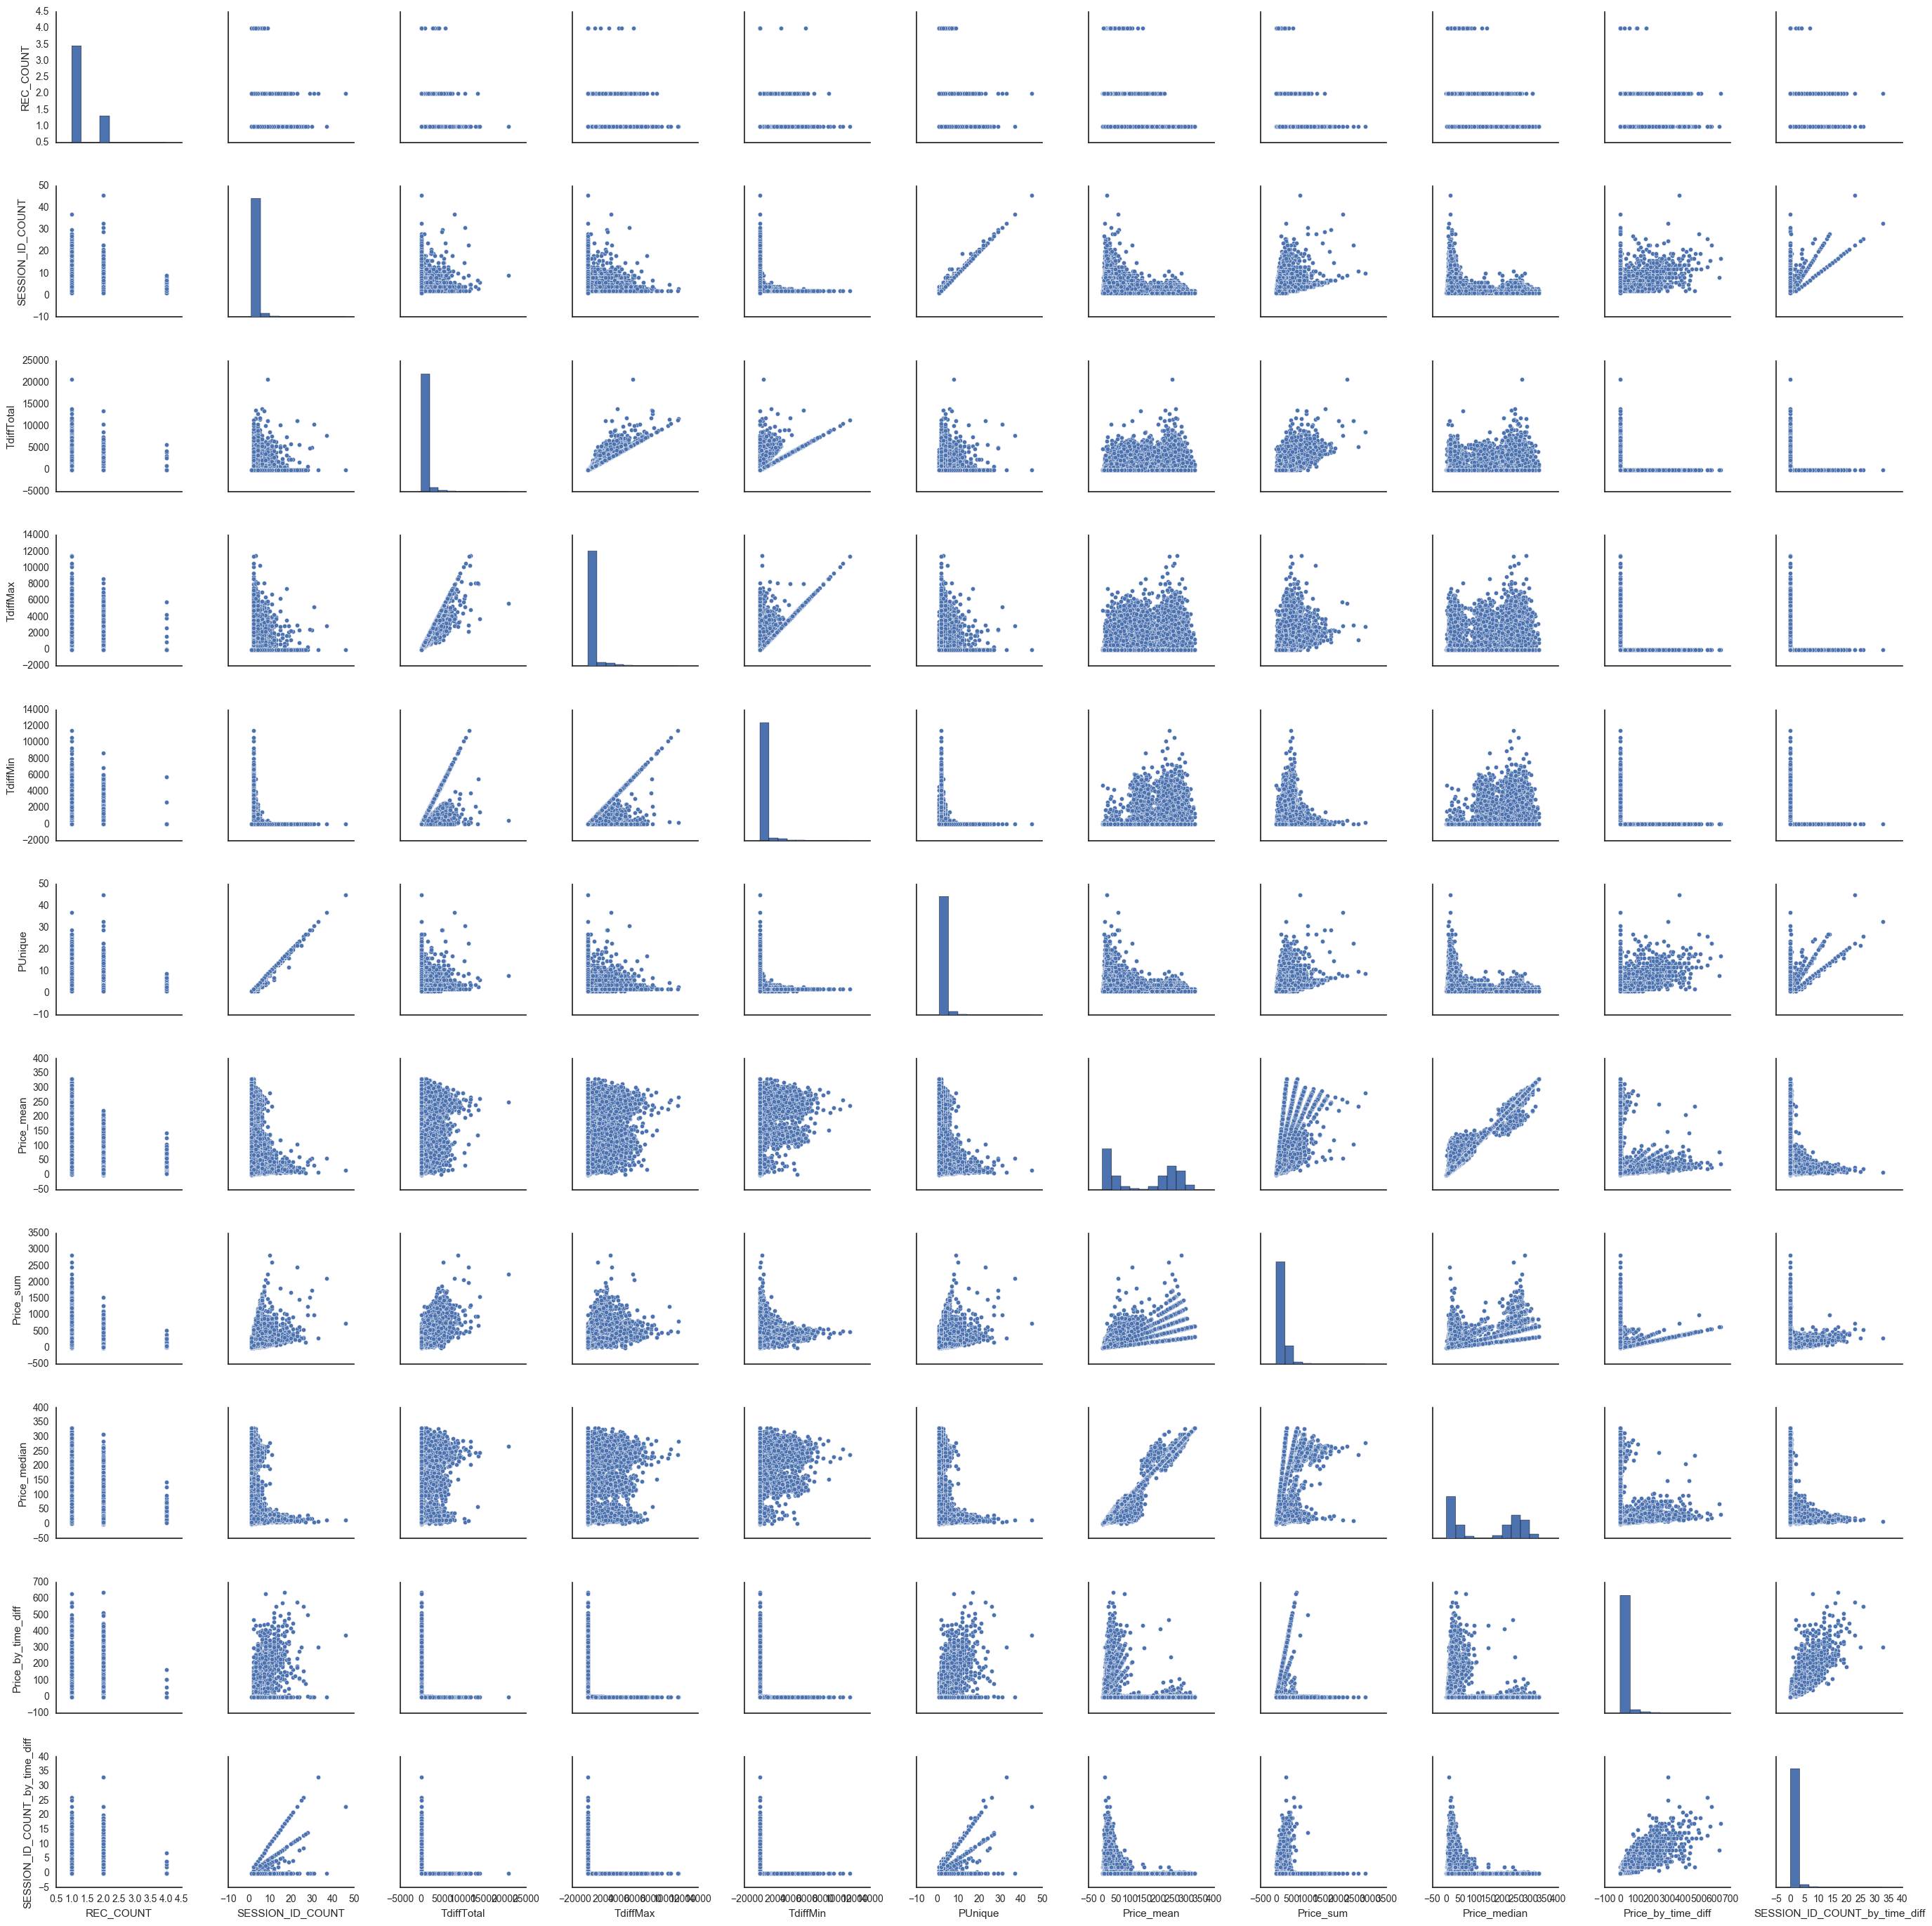

In [53]:
sns.pairplot(sessions[sessions.columns])

# Снижение размерности и поиск аномалий

In [54]:
from sklearn.preprocessing import scale
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA


In [55]:
#шкалируем данные
X = scale(sessions) 

In [78]:
#снижаем размерность
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [58]:
df=pd.DataFrame(columns=('Ncomp', 'coeff', 'feat'))
n=1
for component in pca.components_:
#    print component
    for value, name in zip(component, sessions.columns):
        df.loc[len(df)]=[n,abs(value), name]
    n+=1    

In [59]:
df.sort_values(by=['Ncomp', 'coeff'], ascending=False)

,Ncomp,coeff,feat
13,2.0,0.442184,TdiffTotal
14,2.0,0.437326,TdiffMax
12,2.0,0.367035,SESSION_ID_COUNT
16,2.0,0.366151,PUnique
15,2.0,0.360837,TdiffMin
18,2.0,0.322266,Price_sum
21,2.0,0.240281,SESSION_ID_COUNT_by_time_diff
20,2.0,0.226900,Price_by_time_diff
17,2.0,0.027870,Price_mean
19,2.0,0.019575,Price_median


Таким образом в одной компоненте оказались наиболее важными признаками - статистика по base_price ('Price_mean', 'Price_sum', 'Price_median')
а во второй - временная информация по сессиям - TdiffTotal, TdiffMax, TdiffMin + число покупок и число уникальных товаров: SESSION_ID_COUNT и PUnique

## Попытаемся найти выбросы методом OneClassSVM

In [79]:
OUT_COUNT = 0.005 # предполагаемый процент выбросов

svm_clf = svm.OneClassSVM()
svm_clf.fit(X)

dist_to_border = svm_clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUT_COUNT)
is_outlier = dist_to_border < threshold

(-15, 35)

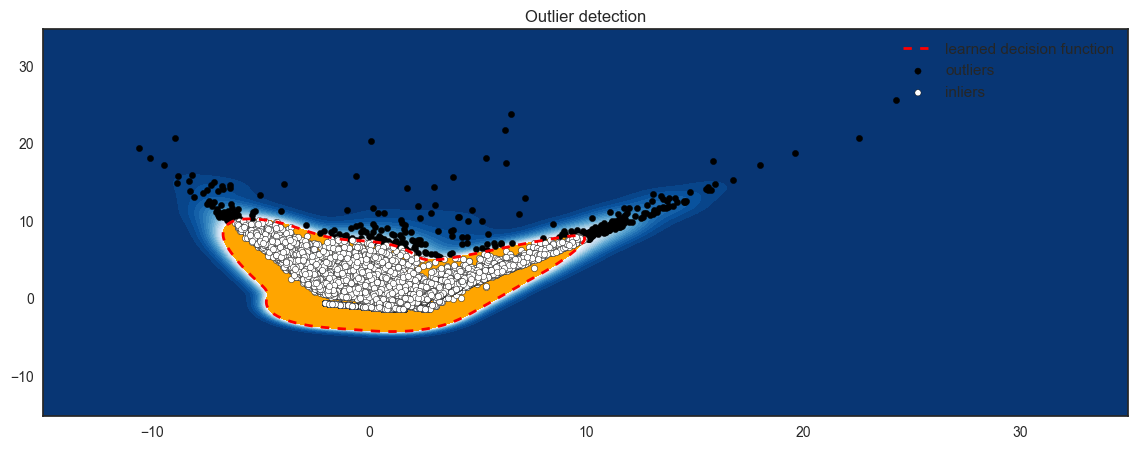

In [88]:
sess_count = sessions.shape[0]
xl=-15; yl=35
xx, yy = np.meshgrid(np.linspace(xl, yl, 500), np.linspace(xl, yl, 500))
n_inliers = int((1. - OUT_COUNT) * sess_count)
n_outliers = int(OUT_COUNT * sess_count)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_outlier, 0], X[is_outlier, 1], c='black')
c = plt.scatter(X[is_outlier == 0, 0], X[is_outlier == 0, 1], c='white')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((xl, yl))
plt.ylim((xl, yl))

# Сами сессии которые можно трактовать как "выбросы"

In [63]:
print (np.shape(sessions[is_outlier])[0])
sessions[is_outlier].sample(10)

331


,REC_COUNT,SESSION_ID_COUNT,TdiffTotal,TdiffMax,TdiffMin,PUnique,Price_mean,Price_sum,Price_median,Price_by_time_diff,SESSION_ID_COUNT_by_time_diff
SESSION_ID,,,,,,,,,,,
6593899069165784064,1,16,2.0,1.0,0.0,16.0,22.687500,363.0,19.0,181.500000,8.000000
3273218111159518208,1,13,2246.0,1195.0,0.0,13.0,79.000000,1027.0,19.0,0.457257,0.005788
8056709589081388032,4,4,3902.0,3902.0,0.0,4.0,98.250000,393.0,47.0,0.100718,0.001025
2048618466505711872,2,13,1.0,1.0,0.0,13.0,25.153846,327.0,29.0,327.000000,13.000000
3419298452998948352,1,16,1.0,1.0,0.0,16.0,14.562500,233.0,14.0,233.000000,16.000000
7864597569730740224,1,14,1.0,1.0,0.0,14.0,26.928571,377.0,22.5,377.000000,14.000000
8152004806580920320,2,16,1.0,1.0,0.0,16.0,14.437500,231.0,14.5,231.000000,16.000000
7352932339405889536,2,7,13461.0,8165.0,0.0,7.0,136.285714,954.0,59.0,0.070871,0.000520
8079061940297408512,1,12,4308.0,4307.0,0.0,12.0,40.583333,487.0,22.0,0.113045,0.002786
